In [1]:
import ATS_Analysis as ats
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
patient_list = ['P110', 'P112', 'P113', 'P114', 'P115', 'P116', 'P117']
df = ats.get_data(['P110', 'P112'], [10, 30])

P110 95 33 27
P112 23 7 7


In [3]:
df.win.value_counts()

30    34
10    34
Name: win, dtype: int64

In [4]:
grouped = df.groupby('win')

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


AttributeError: Cannot access callable attribute '_get_numeric_data' of 'DataFrameGroupBy' objects, try using the 'apply' method

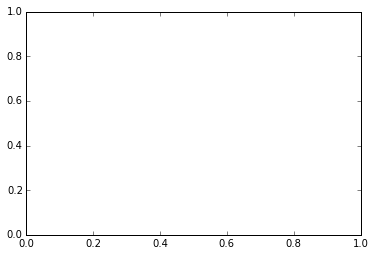

In [6]:
pd.DataFrame.boxplot(grouped, column='ds_freq')

In [ ]:
df.plot(kind='scatter', x='RASS', y='ds_freq')